# Exploratory Data Analysis 

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from tqdm import tqdm

## GTZAN Genre Collection

The dataset consists of 1000 audio tracks each 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22050 Hz (sampling rate) monophonic 16-bit audio files in .au format.

Data Source: https://www.kaggle.com/datasets/carlthome/gtzan-genre-collection

Reference: https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [2]:
# Loading an audio file as a floating point time series (https://librosa.org/doc/main/generated/librosa.load.html)
blues_00_path = 'Datasets/GTZAN/genres/blues/blues.00000.au'

# y: audio time series; sr: sampling rate
blues_00 , blues_00_sr = librosa.load(blues_00_path)

print("Data type of audio time series:", type(blues_00))
print("Shape of audio time series:", blues_00.shape)
print("audio time series:", blues_00)
print("sampling rate:", blues_00_sr)

Data type of audio time series: <class 'numpy.ndarray'>
Shape of audio time series: (661794,)
audio time series: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
sampling rate: 22050


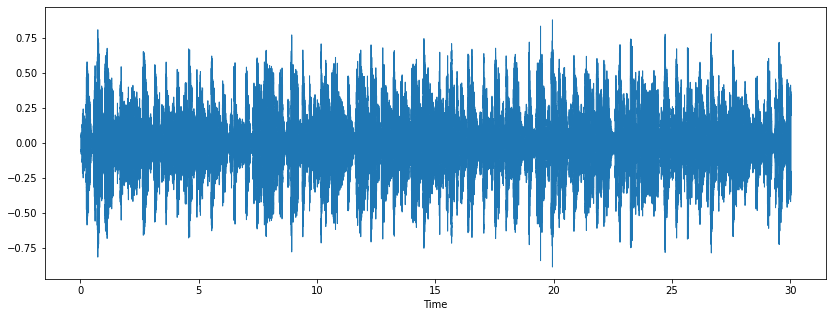

In [3]:
# Visualizing audio (Show the wave of blues.00000.au)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(blues_00, sr=blues_00_sr)

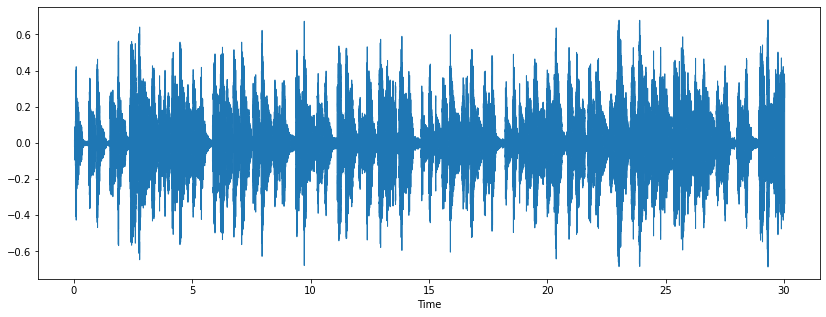

In [4]:
# Show the wave of blues.00001.au
blues_01 , blues_01_sr = librosa.load('Datasets/GTZAN/genres/blues/blues.00001.au')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(blues_01, sr=blues_01_sr)

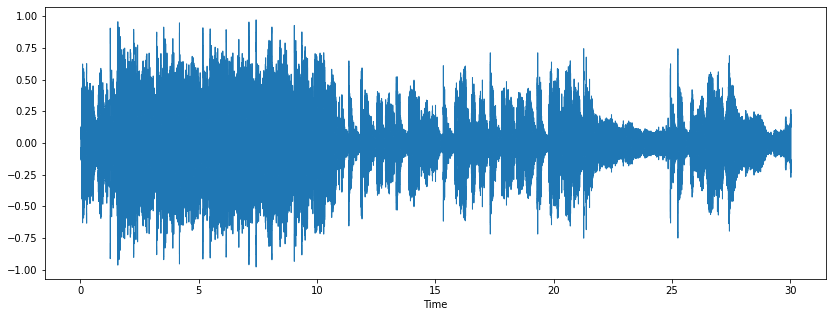

In [5]:
# Show the wave of rock.00000.au
rock_00 , rock_00_sr = librosa.load('Datasets/GTZAN/genres/rock/rock.00000.au')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rock_00, sr=rock_00_sr)

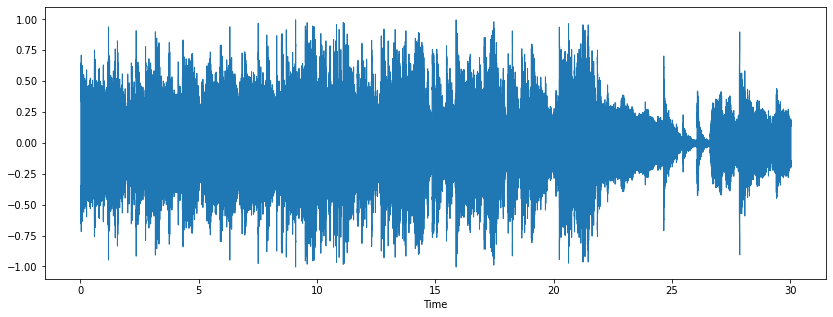

In [6]:
# Show the wave of rock.00001.au
rock_01 , rock_01_sr = librosa.load('Datasets/GTZAN/genres/rock/rock.00001.au')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rock_01, sr=rock_01_sr)

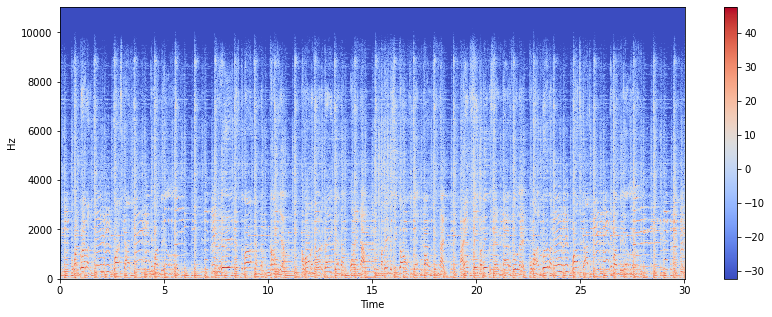

In [7]:
# Spectrogram: a visual representation of the spectrum of frequencies of sound or other signals as they vary with time
# Short Time Fourier Transform (STFT) returns a complex-valued matrix D: np.abs(D(f,t)) -> Amplitude; np.angle(D(f,t)) -> Phase
# Show the spectrogram of blues.00000.au
Blues_00 = librosa.stft(blues_00)

# Convert an amplitude spectrogram to dB-scaled spectrogram
Blues_00_db = librosa.amplitude_to_db(np.abs(Blues_00))

# Show the spectrogram of blues.00000.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(Blues_00_db, sr=blues_00_sr, x_axis='time', y_axis='hz')
plt.colorbar()

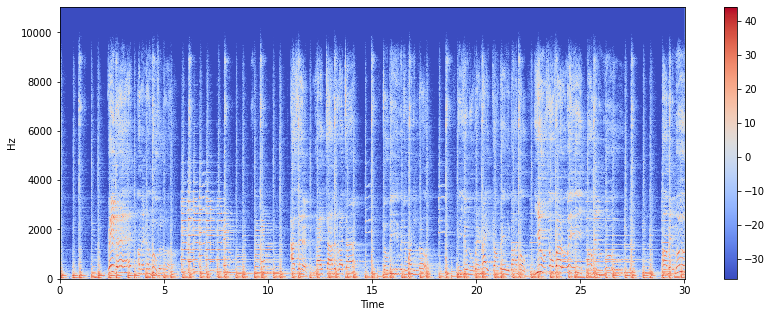

In [8]:
# Show the spectrogram of blues.00001.au
Blues_01 = librosa.stft(blues_01)
Blues_01_db = librosa.amplitude_to_db(np.abs(Blues_01))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Blues_01_db, sr=blues_01_sr, x_axis='time', y_axis='hz')
plt.colorbar()

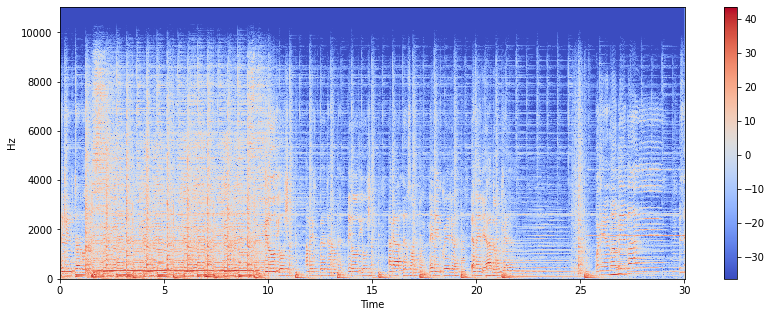

In [9]:
# Show the spectrogram of rock.00000.au
Rock_00 = librosa.stft(rock_00)
Rock_00_db = librosa.amplitude_to_db(np.abs(Rock_00))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Rock_00_db, sr=rock_00_sr, x_axis='time', y_axis='hz')
plt.colorbar()

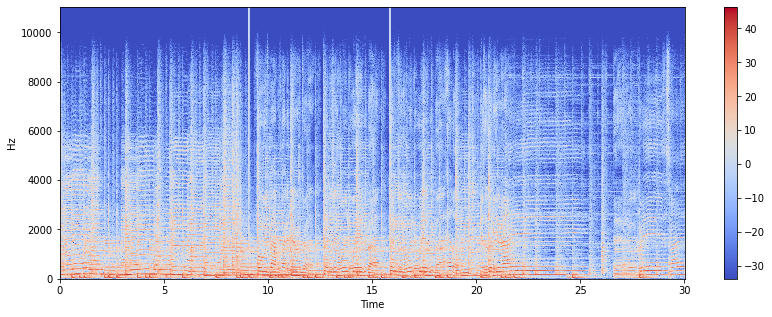

In [10]:
# Show the spectrogram of rock.00001.au
Rock_01 = librosa.stft(rock_01)
Rock_01_db = librosa.amplitude_to_db(np.abs(Rock_01))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Rock_01_db, sr=rock_01_sr, x_axis='time', y_axis='hz')
plt.colorbar()

Ideas: Try different types of inputs to see the performance difference

In [11]:
# Feature extraction: Every audio signal consists of many features
# Mel-Frequency Cepstral Coefficients (MFCCs): A small set of features that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.
# MFCCs of blues.00000.au
mfccs_blues_00 = librosa.feature.mfcc(y=blues_00, sr=blues_00_sr)  # Generate mfccs from a time series
print("Shape of MFCCs of blues.00000.au:", mfccs_blues_00.shape)
mfccs_blues_00

Shape of MFCCs of blues.00000.au: (20, 1293)


array([[-240.63542   , -211.21436   , -193.90889   , ..., -109.999146  ,
         -86.81442   ,  -84.073586  ],
       [  99.64764   ,  101.04283   ,  102.24396   , ...,  150.07935   ,
         138.94867   ,  138.30977   ],
       [  -7.4032764 ,   -8.358528  ,    1.9154348 , ...,  -50.795135  ,
         -36.536144  ,  -28.136356  ],
       ...,
       [   9.741491  ,    6.369472  ,    3.650025  , ...,   -2.857153  ,
          -6.2137365 ,   -0.49142802],
       [   3.5908713 ,    4.05085   ,    4.7889977 , ...,   -7.574688  ,
          -8.446719  ,   -6.7805653 ],
       [   5.348015  ,    3.2318473 ,    0.94024634, ...,   -7.5553374 ,
           0.30610925,    3.523497  ]], dtype=float32)

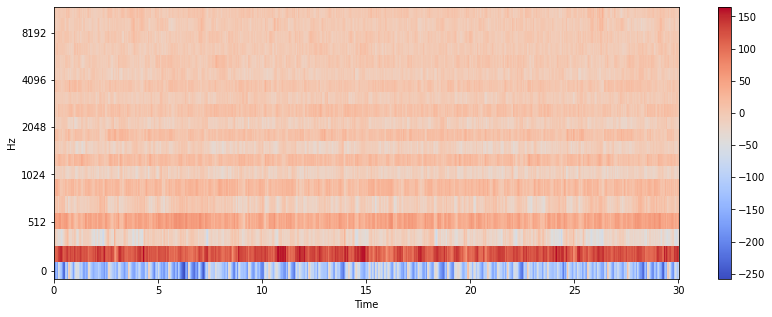

In [12]:
# Visualize the MFCC series of blues.00000.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs_blues_00, x_axis='time', y_axis='mel')
plt.colorbar()

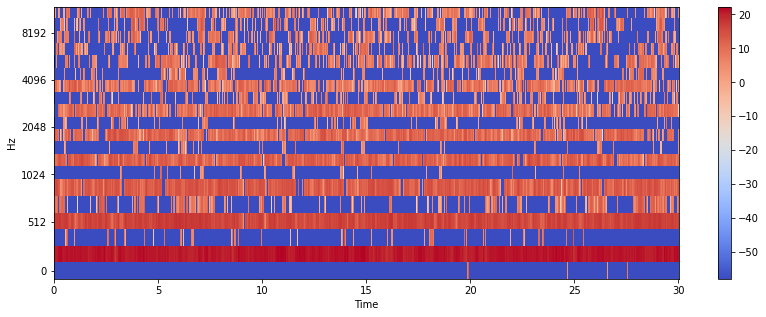

In [13]:
# Change the unit to db -> librosa.power_to_db(mfccs_blues_00))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mfccs_blues_00), x_axis='time', y_axis='mel')
plt.colorbar()

The mel-spectrogram is often log-scaled before. MFCC is a very compressible representation, often using just 20 or 13 coefficients instead of 32-64 bands in Mel spectrogram.

In [14]:
# Mel Spectrogram of blues.00000.au
mel_blues_00 = librosa.feature.melspectrogram(y=blues_00, sr=blues_00_sr)
print("Shape of Mel Spectrogram of blues.00000.au:", mel_blues_00.shape)
mel_blues_00

Shape of Mel Spectrogram of blues.00000.au: (128, 1293)


array([[1.0667158e+00, 1.3738792e+00, 7.4453580e-01, ..., 2.2329819e+00,
        2.3039393e+00, 1.7840994e+01],
       [2.0423384e+00, 3.5833349e+00, 5.0216436e+00, ..., 8.1621199e+00,
        2.3028362e+01, 3.9680309e+01],
       [3.6309794e-01, 4.1330242e-01, 2.9910865e+00, ..., 3.6882622e+00,
        4.0284935e+01, 4.0200470e+01],
       ...,
       [1.3754311e-07, 1.5878594e-07, 2.6747730e-07, ..., 1.0966727e-07,
        1.2381977e-06, 4.3922013e-05],
       [4.9770961e-08, 2.5216679e-08, 1.5669674e-08, ..., 1.3073844e-08,
        8.1212079e-07, 4.1337866e-05],
       [3.4685510e-08, 1.2886810e-08, 4.3950092e-09, ..., 5.0736921e-09,
        7.6096529e-07, 4.0336636e-05]], dtype=float32)

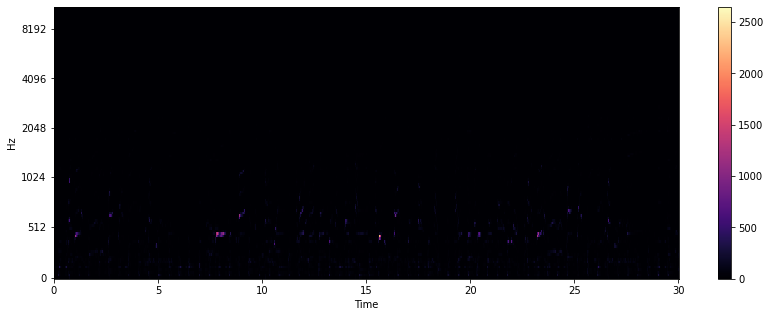

In [15]:
# Visualize the Mel Spectrogram of blues.00000.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_blues_00, x_axis='time', y_axis='mel')
plt.colorbar()

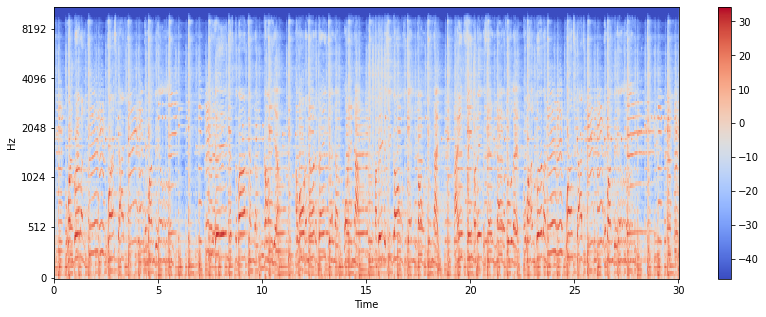

In [16]:
# Change the unit to db -> librosa.power_to_db(mel_blues_00))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mel_blues_00), x_axis='time', y_axis='mel')
plt.colorbar()

In [17]:
# MFCCs of blues.00001.au
mfccs_blues_01 = librosa.feature.mfcc(y=blues_01, sr=blues_01_sr)
print("Shape of MFCCs of blues.00001.au:", mfccs_blues_01.shape)
mfccs_blues_01

Shape of MFCCs of blues.00001.au: (20, 1293)


array([[-3.39146393e+02, -2.23899673e+02, -1.56065292e+02, ...,
        -1.18725746e+02, -1.37507233e+02, -1.27304085e+02],
       [ 1.57718872e+02,  1.44833557e+02,  1.33976578e+02, ...,
         1.11489784e+02,  1.09199516e+02,  1.10712349e+02],
       [ 1.17535114e+01,  1.29924507e+01,  1.19312429e+01, ...,
         1.57594070e+01,  1.96182327e+01,  2.13222351e+01],
       ...,
       [ 3.76574945e+00,  1.49291718e+00,  4.93760395e+00, ...,
         8.07128716e+00,  9.33395672e+00,  4.92159319e+00],
       [-6.10569477e-01, -3.60157943e+00, -3.15349758e-01, ...,
         4.97579956e+00,  2.78385687e+00,  4.17952347e+00],
       [-1.79417992e+00,  2.63862967e-01,  1.75895238e+00, ...,
        -5.80773830e+00, -4.30566549e+00, -1.85314870e+00]], dtype=float32)

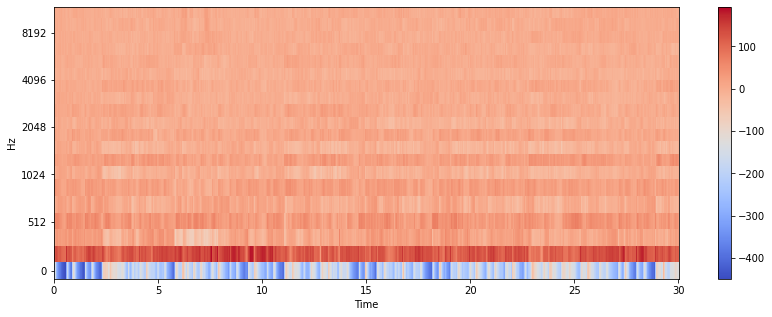

In [18]:
# Visualize the MFCC series of blues.00001.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs_blues_01, x_axis='time', y_axis='mel')
plt.colorbar()

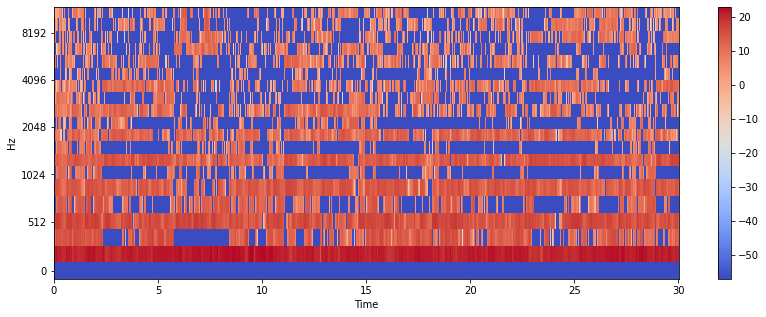

In [19]:
# Change the unit to db -> librosa.power_to_db(mfccs_blues_01))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mfccs_blues_01), x_axis='time', y_axis='mel')
plt.colorbar()

In [20]:
# Mel Spectrogram of blues.00001.au
mel_blues_01 = librosa.feature.melspectrogram(y=blues_01, sr=blues_01_sr)
print("Shape of Mel Spectrogram of blues.00001.au:", mel_blues_01.shape)
mel_blues_01

Shape of Mel Spectrogram of blues.00001.au: (128, 1293)


array([[5.51937103e-01, 1.88884735e+00, 1.96719151e+01, ...,
        1.03499146e+01, 2.38844275e+00, 7.67325163e+00],
       [7.31644392e-01, 1.20169392e+01, 2.23527863e+02, ...,
        1.24086296e+02, 7.31969147e+01, 6.07327461e+01],
       [1.75646245e-01, 2.05185356e+01, 1.76813705e+02, ...,
        2.54415531e+01, 2.40724468e+01, 2.59741402e+01],
       ...,
       [1.58175197e-08, 1.05370056e-07, 8.15616488e-07, ...,
        1.83430345e-07, 2.69088196e-06, 1.32934816e-04],
       [1.20434711e-08, 8.19819057e-09, 2.21795240e-08, ...,
        8.64000071e-09, 2.41256612e-06, 1.28500746e-04],
       [1.14134755e-08, 7.25132576e-09, 6.12192208e-09, ...,
        6.11620132e-09, 2.36291385e-06, 1.26167419e-04]], dtype=float32)

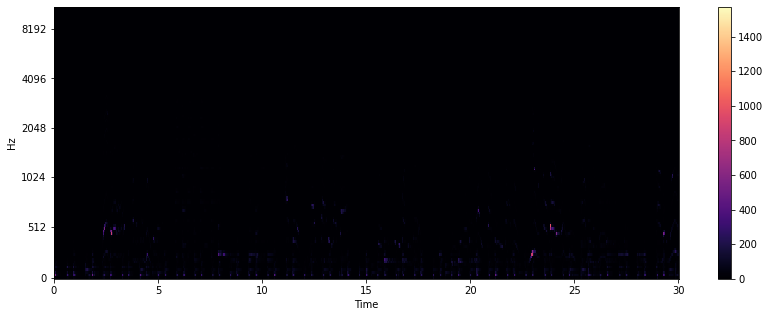

In [21]:
# Visualize the Mel Spectrogram of blues.00001.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_blues_01, x_axis='time', y_axis='mel')
plt.colorbar()

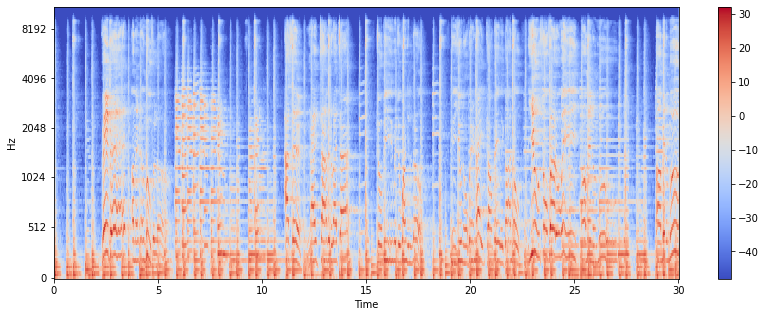

In [22]:
# Change the unit to db -> librosa.power_to_db(mel_blues_01))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mel_blues_01), x_axis='time', y_axis='mel')
plt.colorbar()

In [23]:
# MFCCs of rock.00000.au
mfccs_rock_00 = librosa.feature.mfcc(y=rock_00, sr=rock_00_sr)
print("Shape of MFCCs of rock.00000.au:", mfccs_rock_00.shape)
mfccs_rock_00

Shape of MFCCs of rock.00000.au: (20, 1293)


array([[-2.39354630e+02, -1.65370209e+02, -1.09847160e+02, ...,
        -1.70241913e+02, -1.35798050e+02, -1.08661736e+02],
       [ 1.01094147e+02,  1.26629532e+02,  1.38243210e+02, ...,
         6.95009003e+01,  7.81599197e+01,  7.85406952e+01],
       [-1.42979679e+01, -2.59388199e+01, -3.88696747e+01, ...,
        -2.38578720e+01, -3.78533974e+01, -3.47338715e+01],
       ...,
       [-8.65254116e+00, -1.05504436e+01, -8.63176918e+00, ...,
         4.14559364e+00,  1.14306412e+01, -3.94272447e-01],
       [-2.70148897e+00, -1.60925388e-02,  1.16992807e+00, ...,
        -3.93484640e+00, -5.03302002e+00, -9.27179718e+00],
       [-5.24808884e+00,  4.37955189e+00,  1.08968153e+01, ...,
        -1.52167454e+01, -1.44573288e+01, -1.22771778e+01]], dtype=float32)

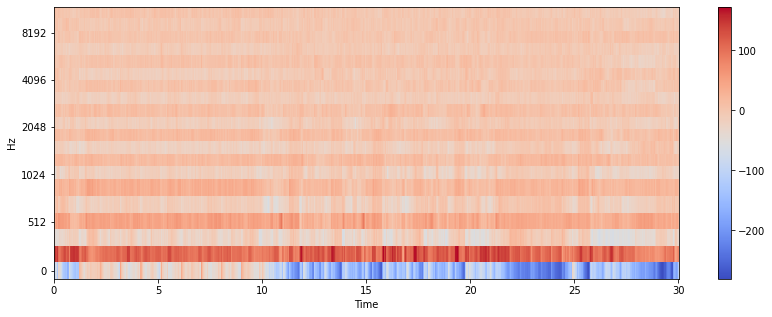

In [24]:
# Visualize the MFCC series of rock.00000.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs_rock_00, x_axis='time', y_axis='mel')
plt.colorbar()

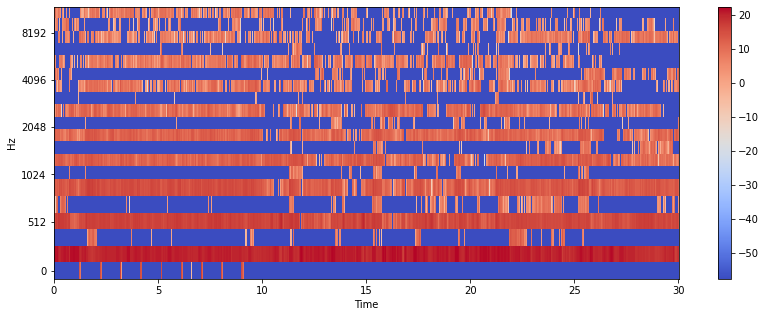

In [25]:
# Change the unit to db -> librosa.power_to_db(mfccs_rock_00))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mfccs_rock_00), x_axis='time', y_axis='mel')
plt.colorbar()

In [26]:
# Mel Spectrogram of rock.00000.au
mel_rock_00 = librosa.feature.melspectrogram(y=rock_00, sr=rock_00_sr)
print("Shape of Mel Spectrogram of rock.00000.au:", mel_rock_00.shape)
mel_rock_00

Shape of Mel Spectrogram of rock.00000.au: (128, 1293)


array([[2.5091045e+00, 2.8769288e+00, 1.6774523e+00, ..., 4.0873390e-02,
        1.0306692e-01, 1.0117838e-01],
       [5.0345640e+00, 8.2911253e+00, 5.2374020e+00, ..., 6.7959309e-02,
        1.9554184e-01, 5.6909621e-01],
       [1.1628902e+00, 8.2030660e-01, 1.7096205e+00, ..., 2.9364355e-02,
        2.3917297e-01, 7.4887395e-01],
       ...,
       [3.4892023e-06, 3.5367902e-06, 2.0522039e-06, ..., 1.8553832e-06,
        7.5133212e-06, 3.3806716e-04],
       [1.9885797e-06, 5.5231914e-07, 6.9590911e-08, ..., 1.2968690e-07,
        5.9869421e-06, 3.1642729e-04],
       [1.8763374e-06, 4.6506582e-07, 8.8509537e-09, ..., 1.1648710e-08,
        5.7716111e-06, 3.0743593e-04]], dtype=float32)

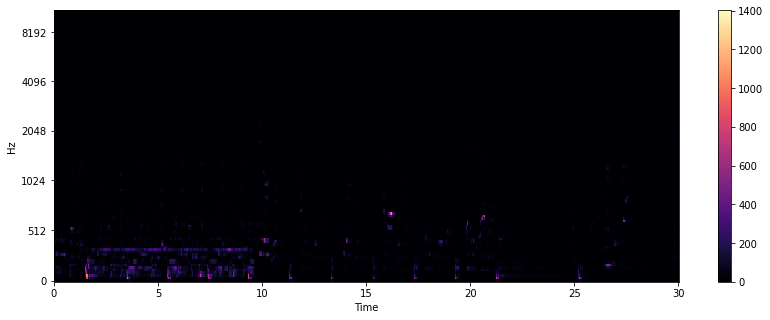

In [27]:
# Visualize the Mel Spectrogram of rock.00000.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_rock_00, x_axis='time', y_axis='mel')
plt.colorbar()

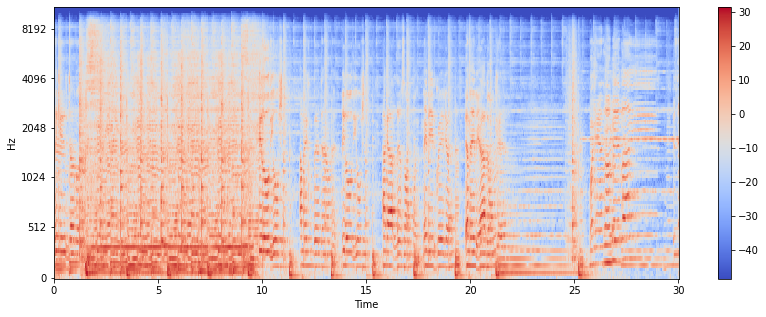

In [28]:
# Change the unit to db -> librosa.power_to_db(mel_rock_00))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mel_rock_00), x_axis='time', y_axis='mel')
plt.colorbar()

In [29]:
# MFCCs of rock.00001.au
mfccs_rock_01 = librosa.feature.mfcc(y=rock_01, sr=rock_01_sr)
print("Shape of MFCCs of rock.00001.au:", mfccs_rock_01.shape)
mfccs_rock_01

Shape of MFCCs of rock.00001.au: (20, 1293)


array([[ -27.909796 ,  -11.236295 ,  -21.453157 , ..., -208.6094   ,
        -209.17929  , -199.86795  ],
       [ 113.330864 ,  110.39684  ,  111.62682  , ...,  109.27138  ,
         113.70387  ,  123.05147  ],
       [ -31.080837 ,  -34.611122 ,  -36.272743 , ...,  -24.026443 ,
         -17.30697  ,   -3.5851398],
       ...,
       [  -7.3053856,   -1.6673676,    3.3723712, ...,   -9.934952 ,
          -8.337861 ,   -5.059801 ],
       [  -6.7251015,  -10.490562 ,  -13.086132 , ...,   -5.935863 ,
          -6.633175 ,   -3.9327388],
       [ -12.095825 ,  -12.103266 ,  -11.925805 , ...,  -24.492474 ,
         -29.480856 ,  -26.831102 ]], dtype=float32)

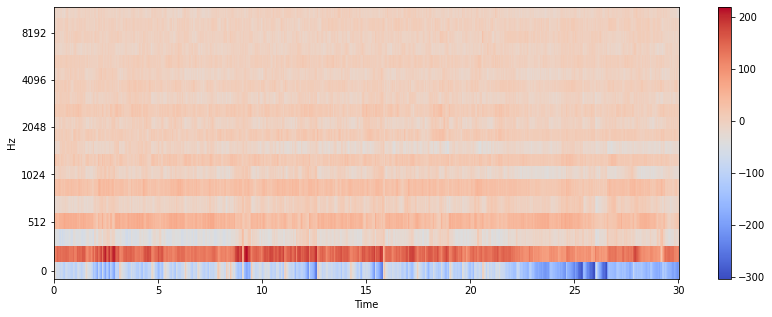

In [30]:
# Visualize the MFCC series of rock.00001.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs_rock_01, x_axis='time', y_axis='mel')
plt.colorbar()

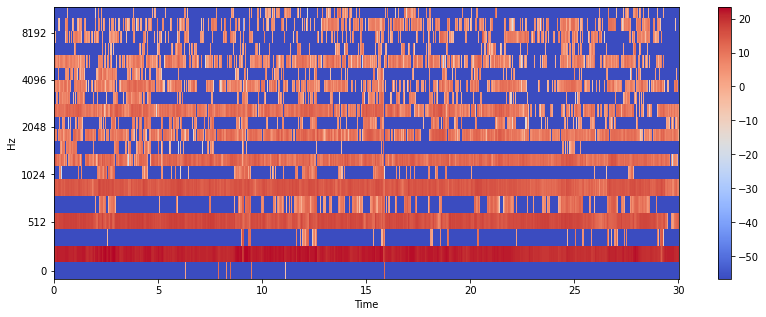

In [31]:
# Change the unit to db -> librosa.power_to_db(mfccs_rock_01))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mfccs_rock_01), x_axis='time', y_axis='mel')
plt.colorbar()

In [32]:
# Mel Spectrogram of rock.00001.au
mel_rock_01 = librosa.feature.melspectrogram(y=rock_01, sr=rock_01_sr)
print("Shape of Mel Spectrogram of rock.00001.au:", mel_rock_01.shape)
mel_rock_01

Shape of Mel Spectrogram of rock.00001.au: (128, 1293)


array([[3.5769353e+00, 3.2195241e+00, 1.6357640e+00, ..., 5.8101914e-03,
        5.3384602e-03, 8.4792096e-03],
       [1.6834614e+01, 1.8675301e+01, 4.9379587e+00, ..., 2.2347003e-02,
        1.0476366e-02, 1.6525041e-02],
       [2.4759912e+01, 1.5577030e+01, 1.1522894e+01, ..., 1.5054473e-02,
        2.8591298e-02, 6.4190157e-02],
       ...,
       [1.9996423e-04, 5.1954717e-05, 3.0302576e-06, ..., 4.6634395e-07,
        1.1278366e-06, 3.6740061e-05],
       [1.6589201e-04, 4.1059142e-05, 3.4590479e-07, ..., 4.0827864e-08,
        7.0911369e-07, 3.5070003e-05],
       [1.5658251e-04, 3.8452104e-05, 1.3258402e-08, ..., 3.5643006e-09,
        6.3972209e-07, 3.3925651e-05]], dtype=float32)

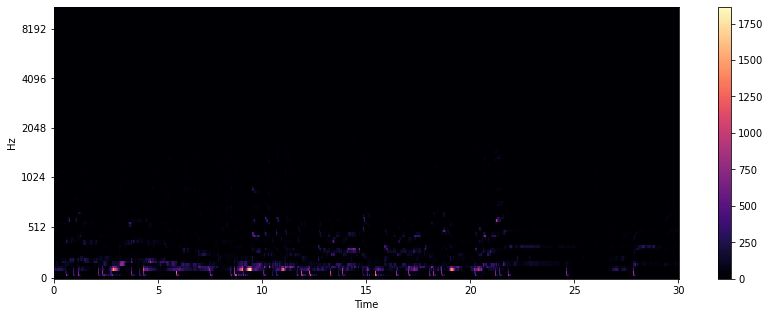

In [33]:
# Visualize the Mel Spectrogram of rock.00001.au
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_rock_01, x_axis='time', y_axis='mel')
plt.colorbar()

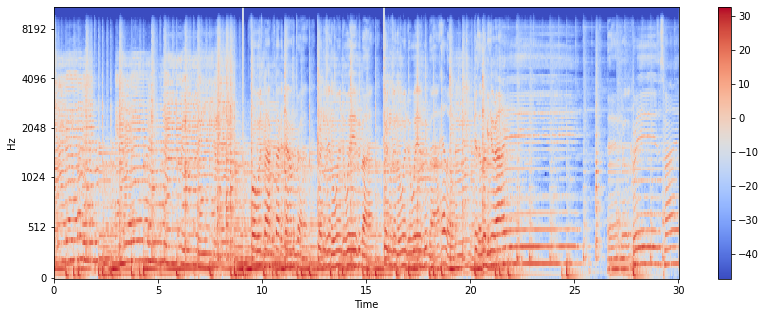

In [34]:
# Change the unit to db -> librosa.power_to_db(mel_rock_01))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(mel_rock_01), x_axis='time', y_axis='mel')
plt.colorbar()